In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from ndac.data_processing import quantile_classify, encode_sequence
from ndac.predict import train_clstm

/Users/joshsmith/Git/NovoNordisk_Capstone/.env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_prest.csv', index_col=0)

# train with nucleotide seq

45206 samples input.
11303 samples above high cut, 11302 samples below low cut, 22601 samples removed.
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 4)            296       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 93,661
Trainable params: 93,661
Non-trainable params: 0
__________________

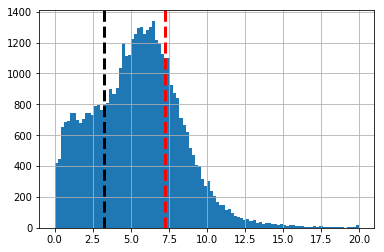

In [3]:
# split quantiles and encode with nucleotide sequence
df, hist = quantile_classify(data['conc_cf'], data['nt_seq'],
                             low_cut=0.25, high_cut=0.75)
X, y = encode_sequence(df['nt_seq'], df['class'],
                       max_length=200, tag='GACAAGCTTGCGGCCGCA')

nt_model = train_clstm(X, y, test_fraction=0.3, 
                       epochs=10)

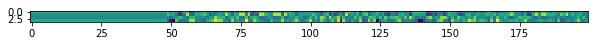

In [27]:
# Visualize embedded sequence after training nt_model
get_1st_layer_output = K.function([nt_model.layers[0].input, K.learning_phase()],
                                  [nt_model.layers[0].output])

x = X[0].reshape(-1,200)  # after using keras Tokenizer on X
# output in train mode = 1
layer_output = get_1st_layer_output([x, 1])[0]

plt.figure(figsize=(10, 1))
plt.imshow(layer_output[0].T)

# train with amino acid sequence

45206 samples input.
11303 samples above high cut, 11302 samples below low cut, 22601 samples removed.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 93,449
Trainable params: 93,449
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
15823/15823 [=======

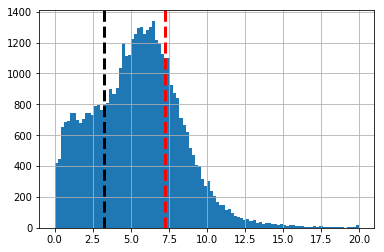

In [28]:
df, hist = quantile_classify(data['conc_cf'], data['aa_seq'])
X, y = encode_sequence(df['aa_seq'], df['class'],
                       max_length=200)

aa_model = train_clstm(X, y, test_fraction=0.3, epochs=3)

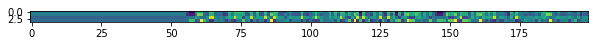

In [29]:
# Visualize embedded sequence after training aa_model
get_1st_layer_output = K.function([aa_model.layers[0].input, K.learning_phase()],
                                  [aa_model.layers[0].output])

x = X[0].reshape(-1,200)  # after using keras Tokenizer on X
# output in train mode = 1
layer_output = get_1st_layer_output([x, 1])[0]

plt.figure(figsize=(10, 1))
plt.imshow(layer_output[0].T)

# solubility multiclass

In [2]:
# read in sequence/property data
data = pd.read_csv('dataframes/DF_solubility.csv', index_col=0)

In [3]:
X, y = encode_sequence(data['aa_seq'], data['solubility_class_1M'],
                       max_length=200)
aa_model = train_clstm(X, y, test_fraction=0.3, epochs=10)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 4)            84        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 128)          1664      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 100, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 606       
Total params: 93,954
Trainable params: 93,954
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
11257/11257 [==========================